# Distributed Training of Neural Network Models


Below is the basic implementation of Federated Learning code for 2 clients and a server for one communication round using the MNIST dataset.

Your task for this lab is to utilize this code as a benchmark and accomplish  the following objectives:

1. Comment each section of the code to understand its functionality.

2. Experiment with different neural network architectures, varying the number of layers and activation functions

3. Assess the model's performance as the number of clients changes. Utilize 2, 4, 6, 8, and 10 clients, and plot a graph illustrating the model's performance across varying client counts.

4. Introduce one dishonest client. For this client, assign some training labels ('y_train') to a specific label, such as '4'. Analyze how the performance ((accuracy, precision, recall, and f-score)) of the global model is affected by the presence of a dishonest client. Find approximately how many labels need to be maliciously altered so that the performance degrades.

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import SGD
from sklearn.model_selection import train_test_split
from keras import backend as K
import random

In [2]:
# Set seed for Python's built-in random number generator

# Set seed for numpy. Put your SID instead of number '42'
np.random.seed(2167288) 
# Set seed for Python's built-in random number generator.  Put your SID instead of number '42'
random.seed(2167288)

# Set seed for TensorFlow tf.random.set_seed(42)
# Put your SID instead of number '42'
tf.random.set_seed(2167288)

K.clear_session() # Set seed for Keras

In [3]:
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
# Normalize and reshape data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

In [5]:
print(x_train.shape)
print(x_test.shape)


(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [19]:
# Define client functions
def create_client_model():
    model = Sequential([
        Flatten(input_shape=(28, 28, 1)),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

def train_client_model(model, x_train, y_train, epochs=5):
    history = model.fit(x_train, y_train, epochs=epochs, 
              #verbose=0,
             verbose=1)
    return model,history

## 2 Clients

In [7]:
# Split data into two clients
x_train_c1, x_train_c2, y_train_c1, y_train_c2 = train_test_split(x_train, y_train, test_size=0.5, 
                                                                  #random_state=42,
                                                  # Put your SID instead of number '42'                
                                                                  random_state= 2167288
                                                                 )

In [8]:
print(x_train_c1.shape)
print(x_train_c2.shape)
print(y_train_c1.shape)
print(y_train_c2.shape)

(30000, 28, 28, 1)
(30000, 28, 28, 1)
(30000,)
(30000,)


In [20]:


# Create and train client models
client1_model = create_client_model()
client2_model = create_client_model()

client1_model, history1 = train_client_model(client1_model, x_train_c1, y_train_c1)
client2_model, history2 = train_client_model(client2_model, x_train_c2, y_train_c2)

Epoch 1/5
938/938 [==============================] - 1s 720us/step - loss: 0.3380 - accuracy: 0.9029
Epoch 2/5
938/938 [==============================] - 1s 863us/step - loss: 0.1611 - accuracy: 0.9527
Epoch 3/5
938/938 [==============================] - 1s 668us/step - loss: 0.1141 - accuracy: 0.9652
Epoch 4/5
938/938 [==============================] - 1s 651us/step - loss: 0.0824 - accuracy: 0.9742
Epoch 5/5
938/938 [==============================] - 1s 664us/step - loss: 0.0638 - accuracy: 0.9811
Epoch 1/5
938/938 [==============================] - 1s 723us/step - loss: 0.3361 - accuracy: 0.9048
Epoch 2/5
938/938 [==============================] - 1s 691us/step - loss: 0.1574 - accuracy: 0.9554
Epoch 3/5
938/938 [==============================] - 1s 675us/step - loss: 0.1082 - accuracy: 0.9682
Epoch 4/5
938/938 [==============================] - 1s 648us/step - loss: 0.0791 - accuracy: 0.9767
Epoch 5/5
938/938 [==============================] - 1s 674us/step - loss: 0.0596 - accurac

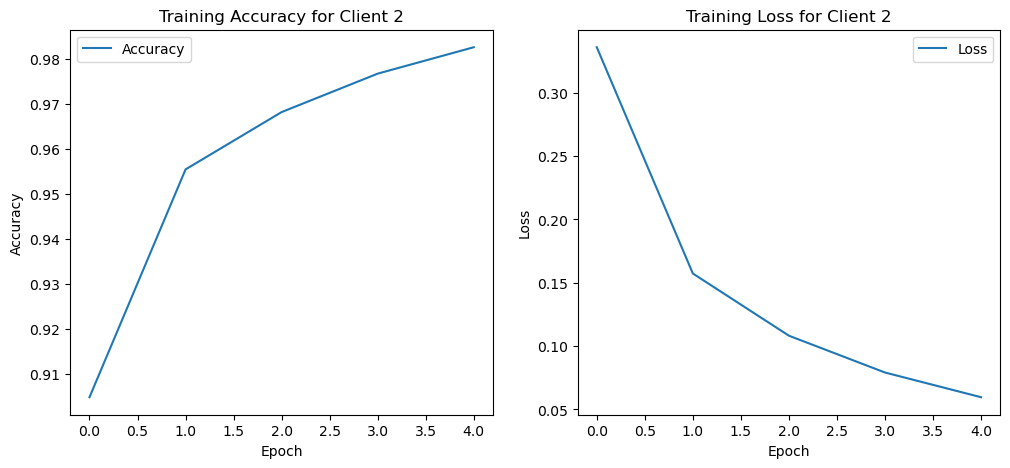

In [21]:
# Plot training history for Client 2
plt.figure(figsize=(12, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history2.history['accuracy'], label='Accuracy')
plt.title('Training Accuracy for Client 2')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history2.history['loss'], label='Loss')
plt.title('Training Loss for Client 2')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [22]:
# Federated averaging

def federated_average_weights(weights1, weights2):
    new_weights = []
    for w1, w2 in zip(weights1, weights2):
        new_weights.append((w1 + w2) / 2)
    return new_weights

In [23]:
# Aggregate models

aggregated_weights = federated_average_weights(client1_model.get_weights(), client2_model.get_weights())

In [24]:
# Create global model and set weights

global_model = create_client_model()
global_model.set_weights(aggregated_weights)

In [25]:
# Evaluate global model

test_loss, test_acc = global_model.evaluate(x_test, y_test, verbose=2)
print('Test accuracy:', test_acc)

313/313 - 0s - loss: 0.3482 - accuracy: 0.9063 - 251ms/epoch - 802us/step
Test accuracy: 0.9063000082969666


In [26]:
test_accuracy = []

In [27]:
test_accuracy.append(0.8851000070571899)

In [28]:
test_accuracy

[0.8851000070571899]

#### Write your code to calculate precision, recall, and F-score


In [29]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [30]:
predictions = global_model.predict(x_test)
print(predictions.shape)

predictions = list(predictions.argmax(axis=1))

313/313 [==============================] - 0s 358us/step
(10000, 10)


In [31]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       980
           1       0.98      0.98      0.98      1135
           2       0.80      0.97      0.88      1032
           3       0.92      0.89      0.90      1010
           4       0.94      0.80      0.86       982
           5       0.89      0.92      0.91       892
           6       0.97      0.94      0.95       958
           7       0.77      0.95      0.85      1028
           8       0.95      0.85      0.89       974
           9       0.96      0.80      0.87      1009

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



In [32]:
print("Accuracy test set: ", accuracy_score(y_test, predictions))

print("Precision test set: ", precision_score(y_test, predictions, average = 'weighted' )) 
print("Recall test set: ", recall_score(y_test, predictions, average = 'weighted' ))
print("F-score test set: ", f1_score(y_test, predictions, average = 'weighted' ))

Accuracy test set:  0.9063
Precision test set:  0.9138997605919176
Recall test set:  0.9063
F-score test set:  0.9066177292082812


In [33]:
test_precision = []
test_recall    = []
test_f1_score  = []

In [34]:
test_precision.append(0.907323157047967)
test_recall.append(0.8851)
test_f1_score.append(0.8851514824563385)

#### Display confusion matrix between actual and predicted values on the test data.


In [35]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

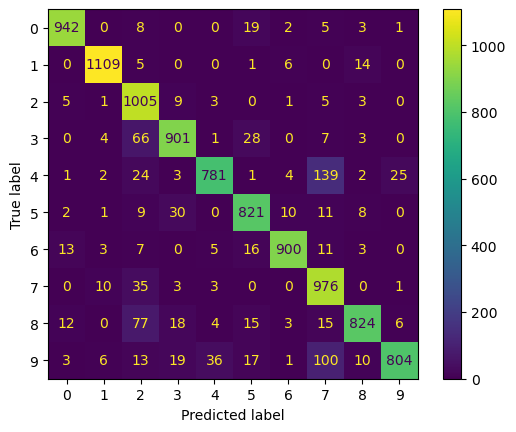

In [36]:
# display confusion matrix between test output and predicted output

cm = confusion_matrix(y_test, predictions) 
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot();
#plt.show()

## Lab Logbook requirement: Document the

1. Plot the model's performance for the number of clients ranging from 2, 4, 6, 8, and 10.

2. For any specified number of clients, compare the model's performance when one (or more) dishonest clients are present. Plot the performance metrics before and after the presence of dishonest clients.

## Plot the model's performance for the number of clients ranging from 2, 4, 6, 8, and 10.

## 4 Clients

In [37]:
# Split data into 4 clients

In [38]:
Client_1 = (x_train[0:15000], y_train[0:15000])
Client_2 = (x_train[15000:30000], y_train[15000:30000])
Client_3 = (x_train[30000:45000], y_train[30000:45000])
Client_4 = (x_train[45000:], y_train[45000:])

In [39]:
print(Client_1[0].shape)
print(Client_2[0].shape)
print(Client_3[0].shape)
print(Client_4[0].shape)

print(Client_1[1].shape)
print(Client_2[1].shape)
print(Client_3[1].shape)
print(Client_4[1].shape)

(15000, 28, 28, 1)
(15000, 28, 28, 1)
(15000, 28, 28, 1)
(15000, 28, 28, 1)
(15000,)
(15000,)
(15000,)
(15000,)


In [40]:
# Create and train client models
client1_model = create_client_model()
client2_model = create_client_model()
client3_model = create_client_model()
client4_model = create_client_model()

client1_model = train_client_model(client1_model, Client_1[0], Client_1[1])
client2_model = train_client_model(client2_model, Client_2[0], Client_1[1])
client3_model = train_client_model(client3_model, Client_3[0], Client_1[1])
client4_model = train_client_model(client4_model, Client_4[0], Client_1[1])

Epoch 1/5
469/469 [==============================] - 0s 689us/step - loss: 0.4406 - accuracy: 0.8759
Epoch 2/5
469/469 [==============================] - 0s 688us/step - loss: 0.2066 - accuracy: 0.9423
Epoch 3/5
469/469 [==============================] - 0s 683us/step - loss: 0.1456 - accuracy: 0.9598
Epoch 4/5
469/469 [==============================] - 0s 670us/step - loss: 0.1084 - accuracy: 0.9702
Epoch 5/5
469/469 [==============================] - 0s 660us/step - loss: 0.0816 - accuracy: 0.9769
Epoch 1/5
469/469 [==============================] - 0s 688us/step - loss: 2.3133 - accuracy: 0.1001
Epoch 2/5
469/469 [==============================] - 0s 645us/step - loss: 2.2974 - accuracy: 0.1205
Epoch 3/5
469/469 [==============================] - 0s 704us/step - loss: 2.2886 - accuracy: 0.1325
Epoch 4/5
469/469 [==============================] - 0s 622us/step - loss: 2.2732 - accuracy: 0.1438
Epoch 5/5
469/469 [==============================] - 0s 631us/step - loss: 2.2556 - accurac

Epoch 1/5
469/469 [==============================] - 0s 728us/step - loss: 0.4342 - accuracy: 0.8783
Epoch 2/5
469/469 [==============================] - 0s 708us/step - loss: 0.2121 - accuracy: 0.9404
Epoch 3/5
469/469 [==============================] - 0s 640us/step - loss: 0.1558 - accuracy: 0.9553
Epoch 4/5
469/469 [==============================] - 0s 655us/step - loss: 0.1186 - accuracy: 0.9673
Epoch 5/5
469/469 [==============================] - 0s 632us/step - loss: 0.0948 - accuracy: 0.9740


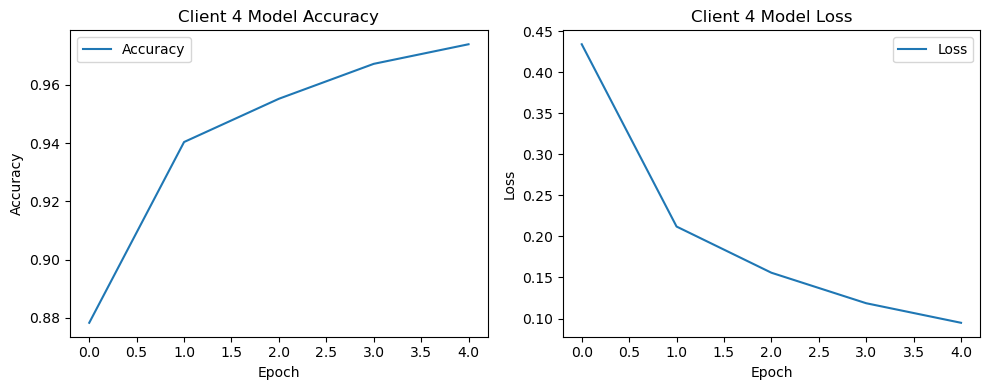

In [42]:

def train_client_model(model, x_train, y_train, epochs=5):
    history = model.fit(x_train, y_train, epochs=epochs, verbose=1)
    return model, history

# Select data for Client 4
Client_4 = (x_train[45000:], y_train[45000:])

# Create and train client model
client4_model = create_client_model()
client4_model, history4 = train_client_model(client4_model, Client_4[0], Client_4[1])

# Plot the model's performance for Client 4
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history4.history['accuracy'], label='Accuracy')
plt.title('Client 4 Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history4.history['loss'], label='Loss')
plt.title('Client 4 Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [43]:
# Federated averaging
def federated_average_weights(weights1, weights2, weights3, weights4):
    new_weights = []
    for w1, w2, w3, w4 in zip(weights1, weights2, weights3, weights4):
        new_weights.append((w1 + w2 + w3 + w4) / 4)
    return new_weights


In [44]:
# Aggregate models
aggregated_weights = federated_average_weights(client1_model.get_weights(), 
                                               client2_model.get_weights(), 
                                               client3_model.get_weights(),
                                               client4_model.get_weights())

# Create global model and set weights
global_model = create_client_model()
global_model.set_weights(aggregated_weights)

AttributeError: 'tuple' object has no attribute 'get_weights'

In [45]:
# Evaluate global model
test_loss, test_acc = global_model.evaluate(x_test, y_test, verbose=2)
print('Test accuracy:', test_acc)

313/313 - 0s - loss: 0.3482 - accuracy: 0.9063 - 135ms/epoch - 431us/step
Test accuracy: 0.9063000082969666


In [46]:
predictions = global_model.predict(x_test)
print(predictions.shape)

predictions = list(predictions.argmax(axis=1))

313/313 [==============================] - 0s 347us/step
(10000, 10)


In [47]:
print("Accuracy test set: ", accuracy_score(y_test, predictions))

print("Precision test set: ", precision_score(y_test, predictions, average = 'weighted' )) 
print("Recall test set: ", recall_score(y_test, predictions, average = 'weighted' ))
print("F-score test set: ", f1_score(y_test, predictions, average = 'weighted' ))

print(classification_report(y_test, predictions))

Accuracy test set:  0.9063
Precision test set:  0.9138997605919176
Recall test set:  0.9063
F-score test set:  0.9066177292082812
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       980
           1       0.98      0.98      0.98      1135
           2       0.80      0.97      0.88      1032
           3       0.92      0.89      0.90      1010
           4       0.94      0.80      0.86       982
           5       0.89      0.92      0.91       892
           6       0.97      0.94      0.95       958
           7       0.77      0.95      0.85      1028
           8       0.95      0.85      0.89       974
           9       0.96      0.80      0.87      1009

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



In [48]:
test_accuracy.append(0.28790000081062317)
test_precision.append(0.37310911314701634)
test_recall.append(0.2879)
test_f1_score.append(0.2500357846568731)

In [49]:
print(test_accuracy)
print(test_precision)
print(test_recall)
print(test_f1_score)

[0.8851000070571899, 0.28790000081062317]
[0.907323157047967, 0.37310911314701634]
[0.8851, 0.2879]
[0.8851514824563385, 0.2500357846568731]


## 6 Clients

In [50]:
Client_1 = (x_train[0:10000], y_train[0:10000])
Client_2 = (x_train[10000:20000], y_train[10000:20000])
Client_3 = (x_train[20000:30000], y_train[20000:30000])
Client_4 = (x_train[30000:40000], y_train[30000:40000])
Client_5 = (x_train[40000:50000], y_train[40000:50000])
Client_6 = (x_train[50000:], y_train[50000:])

print(Client_1[0].shape)
print(Client_2[0].shape)
print(Client_3[0].shape)
print(Client_4[0].shape)
print(Client_5[0].shape)
print(Client_6[0].shape)

print(Client_1[1].shape)
print(Client_2[1].shape)
print(Client_3[1].shape)
print(Client_4[1].shape)
print(Client_5[1].shape)
print(Client_6[1].shape)

(10000, 28, 28, 1)
(10000, 28, 28, 1)
(10000, 28, 28, 1)
(10000, 28, 28, 1)
(10000, 28, 28, 1)
(10000, 28, 28, 1)
(10000,)
(10000,)
(10000,)
(10000,)
(10000,)
(10000,)


In [51]:
# Create and train client models
client1_model = create_client_model()
client2_model = create_client_model()
client3_model = create_client_model()
client4_model = create_client_model()
client5_model = create_client_model()
client6_model = create_client_model()

client1_model = train_client_model(client1_model, Client_1[0], Client_1[1])
client2_model = train_client_model(client2_model, Client_2[0], Client_1[1])
client3_model = train_client_model(client3_model, Client_3[0], Client_1[1])
client4_model = train_client_model(client4_model, Client_4[0], Client_1[1])
client5_model = train_client_model(client5_model, Client_5[0], Client_5[1])
client6_model = train_client_model(client6_model, Client_6[0], Client_6[1])

Epoch 1/5
313/313 [==============================] - 0s 686us/step - loss: 0.5274 - accuracy: 0.8561
Epoch 2/5
313/313 [==============================] - 0s 640us/step - loss: 0.2402 - accuracy: 0.9329
Epoch 3/5
313/313 [==============================] - 0s 630us/step - loss: 0.1769 - accuracy: 0.9506
Epoch 4/5
313/313 [==============================] - 0s 662us/step - loss: 0.1338 - accuracy: 0.9632
Epoch 5/5
313/313 [==============================] - 0s 636us/step - loss: 0.1052 - accuracy: 0.9704
Epoch 1/5
313/313 [==============================] - 0s 660us/step - loss: 2.3169 - accuracy: 0.1024
Epoch 2/5
313/313 [==============================] - 0s 671us/step - loss: 2.2931 - accuracy: 0.1252
Epoch 3/5
313/313 [==============================] - 0s 671us/step - loss: 2.2810 - accuracy: 0.1323
Epoch 4/5
313/313 [==============================] - 0s 725us/step - loss: 2.2617 - accuracy: 0.1510
Epoch 5/5
313/313 [==============================] - 0s 645us/step - loss: 2.2348 - accurac

Epoch 1/5
313/313 [==============================] - 0s 770us/step - loss: 0.5009 - accuracy: 0.8589
Epoch 2/5
313/313 [==============================] - 0s 682us/step - loss: 0.2319 - accuracy: 0.9332
Epoch 3/5
313/313 [==============================] - 0s 762us/step - loss: 0.1694 - accuracy: 0.9514
Epoch 4/5
313/313 [==============================] - 0s 711us/step - loss: 0.1286 - accuracy: 0.9637
Epoch 5/5
313/313 [==============================] - 0s 645us/step - loss: 0.1002 - accuracy: 0.9729


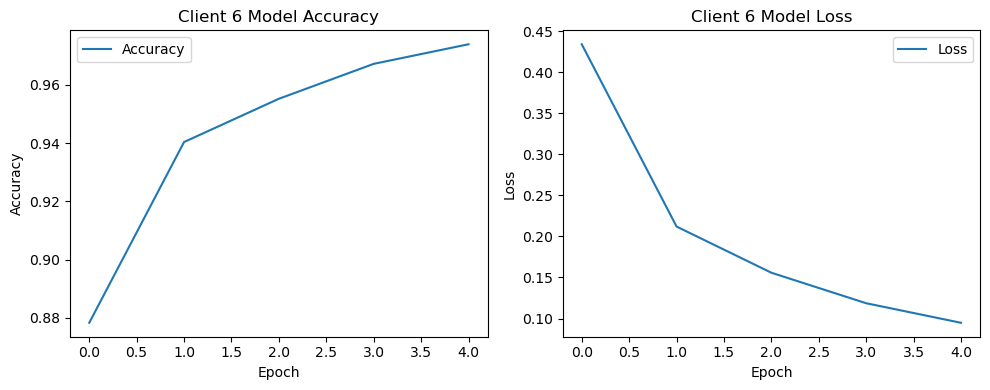

In [52]:
def train_client_model(model, x_train, y_train, epochs=5):
    history = model.fit(x_train, y_train, epochs=epochs, verbose=1)
    return model, history

# Select data for Client 6
Client_6 = (x_train[50000:], y_train[50000:])

# Create and train client model
client6_model = create_client_model()
client6_model, history6 = train_client_model(client6_model, Client_6[0], Client_6[1])

# Plot the model's performance for Client 6
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history4.history['accuracy'], label='Accuracy')
plt.title('Client 6 Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history4.history['loss'], label='Loss')
plt.title('Client 6 Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [53]:
# Federated averaging
def federated_average_weights(weights1, weights2, weights3, weights4, weights5, weights6):
    new_weights = []
    for w1, w2, w3, w4, w5, w6 in zip(weights1, weights2, weights3, weights4, weights5, weights6):
        new_weights.append((w1 + w2 + w3 + w4 + w5 + w6) / 6)
    return new_weights


# Aggregate models
aggregated_weights = federated_average_weights(client1_model.get_weights(), 
                                               client2_model.get_weights(), 
                                               client3_model.get_weights(),
                                               client4_model.get_weights(),
                                               client5_model.get_weights(),
                                               client6_model.get_weights())

# Create global model and set weights
global_model = create_client_model()
global_model.set_weights(aggregated_weights)

AttributeError: 'tuple' object has no attribute 'get_weights'

In [54]:
# Evaluate global model
test_loss, test_acc = global_model.evaluate(x_test, y_test, verbose=2)
print('Test accuracy:', test_acc)

predictions = global_model.predict(x_test)
print(predictions.shape)

predictions = list(predictions.argmax(axis=1))

print("Accuracy test set: ", accuracy_score(y_test, predictions))

print("Precision test set: ", precision_score(y_test, predictions, average = 'weighted' )) 
print("Recall test set: ", recall_score(y_test, predictions, average = 'weighted' ))
print("F-score test set: ", f1_score(y_test, predictions, average = 'weighted' ))

print(classification_report(y_test, predictions))

313/313 - 0s - loss: 0.3482 - accuracy: 0.9063 - 189ms/epoch - 604us/step
Test accuracy: 0.9063000082969666
313/313 [==============================] - 0s 351us/step
(10000, 10)
Accuracy test set:  0.9063
Precision test set:  0.9138997605919176
Recall test set:  0.9063
F-score test set:  0.9066177292082812
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       980
           1       0.98      0.98      0.98      1135
           2       0.80      0.97      0.88      1032
           3       0.92      0.89      0.90      1010
           4       0.94      0.80      0.86       982
           5       0.89      0.92      0.91       892
           6       0.97      0.94      0.95       958
           7       0.77      0.95      0.85      1028
           8       0.95      0.85      0.89       974
           9       0.96      0.80      0.87      1009

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91

In [56]:
test_accuracy.append(0.7271999716758728)
test_precision.append(0.7834205071021751)
test_recall.append(0.7272)
test_f1_score.append(0.7308748558259915)

print(test_accuracy)
print(test_precision)
print(test_recall)
print(test_f1_score)

[0.8851000070571899, 0.28790000081062317, 0.7271999716758728, 0.7271999716758728]
[0.907323157047967, 0.37310911314701634, 0.7834205071021751, 0.7834205071021751]
[0.8851, 0.2879, 0.7272, 0.7272]
[0.8851514824563385, 0.2500357846568731, 0.7308748558259915, 0.7308748558259915]


## 8 Clients

In [57]:
Client_1 = (x_train[0:7500], y_train[0:7500])
Client_2 = (x_train[7500:15000], y_train[7500:15000])
Client_3 = (x_train[15000:22500], y_train[15000:22500])
Client_4 = (x_train[22500:30000], y_train[22500:30000])
Client_5 = (x_train[30000:37500], y_train[30000:37500])
Client_6 = (x_train[37500:45000], y_train[37500:45000])
Client_7 = (x_train[45000:52500], y_train[45000:52500])
Client_8 = (x_train[52500:], y_train[52500:])

print(Client_1[0].shape)
print(Client_2[0].shape)
print(Client_3[0].shape)
print(Client_4[0].shape)
print(Client_5[0].shape)
print(Client_6[0].shape)
print(Client_7[0].shape)
print(Client_8[0].shape)

print(Client_1[1].shape)
print(Client_2[1].shape)
print(Client_3[1].shape)
print(Client_4[1].shape)
print(Client_5[1].shape)
print(Client_6[1].shape)
print(Client_7[1].shape)
print(Client_8[1].shape)

# Create and train client models
client1_model = create_client_model()
client2_model = create_client_model()
client3_model = create_client_model()
client4_model = create_client_model()
client5_model = create_client_model()
client6_model = create_client_model()
client7_model = create_client_model()
client8_model = create_client_model()

client1_model = train_client_model(client1_model, Client_1[0], Client_1[1])
client2_model = train_client_model(client2_model, Client_2[0], Client_1[1])
client3_model = train_client_model(client3_model, Client_3[0], Client_1[1])
client4_model = train_client_model(client4_model, Client_4[0], Client_1[1])
client5_model = train_client_model(client5_model, Client_5[0], Client_5[1])
client6_model = train_client_model(client6_model, Client_6[0], Client_6[1])
client7_model = train_client_model(client7_model, Client_7[0], Client_7[1])
client8_model = train_client_model(client8_model, Client_8[0], Client_8[1])

(7500, 28, 28, 1)
(7500, 28, 28, 1)
(7500, 28, 28, 1)
(7500, 28, 28, 1)
(7500, 28, 28, 1)
(7500, 28, 28, 1)
(7500, 28, 28, 1)
(7500, 28, 28, 1)
(7500,)
(7500,)
(7500,)
(7500,)
(7500,)
(7500,)
(7500,)
(7500,)
Epoch 1/5
235/235 [==============================] - 0s 681us/step - loss: 0.5832 - accuracy: 0.8460
Epoch 2/5
235/235 [==============================] - 0s 649us/step - loss: 0.2577 - accuracy: 0.9305
Epoch 3/5
235/235 [==============================] - 0s 639us/step - loss: 0.1905 - accuracy: 0.9453
Epoch 4/5
235/235 [==============================] - 0s 656us/step - loss: 0.1436 - accuracy: 0.9621
Epoch 5/5
235/235 [==============================] - 0s 656us/step - loss: 0.1164 - accuracy: 0.9685
Epoch 1/5
235/235 [==============================] - 0s 695us/step - loss: 2.3288 - accuracy: 0.1020
Epoch 2/5
235/235 [==============================] - 0s 723us/step - loss: 2.2891 - accuracy: 0.1332
Epoch 3/5
235/235 [==============================] - 0s 733us/step - loss: 2.2704 - a

Epoch 1/5
235/235 [==============================] - 0s 732us/step - loss: 0.5394 - accuracy: 0.8511
Epoch 2/5
235/235 [==============================] - 0s 718us/step - loss: 0.2371 - accuracy: 0.9347
Epoch 3/5
235/235 [==============================] - 0s 715us/step - loss: 0.1779 - accuracy: 0.9492
Epoch 4/5
235/235 [==============================] - 0s 718us/step - loss: 0.1316 - accuracy: 0.9631
Epoch 5/5
235/235 [==============================] - 0s 725us/step - loss: 0.1029 - accuracy: 0.9723


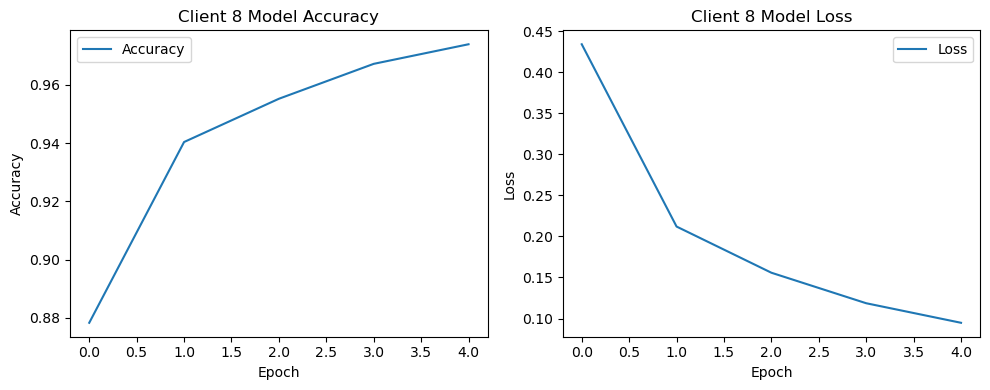

In [59]:
def train_client_model(model, x_train, y_train, epochs=5):
    history = model.fit(x_train, y_train, epochs=epochs, verbose=1)
    return model, history

# Select data for Client 8
Client_8 = (x_train[52500:], y_train[52500:])

# Create and train client model
client8_model = create_client_model()
client8_model, history8 = train_client_model(client8_model, Client_8[0], Client_8[1])

# Plot the model's performance for Client 8
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history4.history['accuracy'], label='Accuracy')
plt.title('Client 8 Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history4.history['loss'], label='Loss')
plt.title('Client 8 Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [42]:
# Federated averaging
def federated_average_weights(weights1, weights2, weights3, weights4, 
                              weights5, weights6, weights7, weights8):
    new_weights = []
    for w1, w2, w3, w4, w5, w6, w7, w8 in zip(weights1, weights2, weights3, weights4, 
                                              weights5, weights6, weights7, weights8):
        new_weights.append((w1 + w2 + w3 + w4 + w5 + w6 + w7 +w8) / 8)
    return new_weights


# Aggregate models
aggregated_weights = federated_average_weights(client1_model.get_weights(), 
                                               client2_model.get_weights(), 
                                               client3_model.get_weights(),
                                               client4_model.get_weights(),
                                               client5_model.get_weights(),
                                               client6_model.get_weights(),
                                               client7_model.get_weights(),
                                               client8_model.get_weights())

# Create global model and set weights
global_model = create_client_model()
global_model.set_weights(aggregated_weights)

In [43]:
# Evaluate global model
test_loss, test_acc = global_model.evaluate(x_test, y_test, verbose=2)
print('Test accuracy:', test_acc)

predictions = global_model.predict(x_test)
print(predictions.shape)

predictions = list(predictions.argmax(axis=1))

print("Accuracy test set: ", accuracy_score(y_test, predictions))

print("Precision test set: ", precision_score(y_test, predictions, average = 'weighted' )) 
print("Recall test set: ", recall_score(y_test, predictions, average = 'weighted' ))
print("F-score test set: ", f1_score(y_test, predictions, average = 'weighted' ))

print(classification_report(y_test, predictions))

313/313 - 0s - loss: 1.8108 - accuracy: 0.6028 - 481ms/epoch - 2ms/step
Test accuracy: 0.6028000116348267
313/313 [==============================] - 0s 1ms/step
(10000, 10)
Accuracy test set:  0.6028
Precision test set:  0.7986126719530607
Recall test set:  0.6028
F-score test set:  0.5536289939655649
              precision    recall  f1-score   support

           0       1.00      0.07      0.12       980
           1       0.99      0.87      0.93      1135
           2       0.66      0.83      0.73      1032
           3       0.80      0.79      0.80      1010
           4       0.83      0.85      0.84       982
           5       0.26      0.92      0.41       892
           6       0.97      0.63      0.76       958
           7       0.54      0.94      0.68      1028
           8       0.99      0.09      0.17       974
           9       0.89      0.01      0.02      1009

    accuracy                           0.60     10000
   macro avg       0.79      0.60      0.55    

In [44]:
test_accuracy.append(0.6028000116348267)
test_precision.append(0.7986126719530607)
test_recall.append(0.6028)
test_f1_score.append(0.5536289939655649)

print(test_accuracy)
print(test_precision)
print(test_recall)
print(test_f1_score)

[0.8851000070571899, 0.28790000081062317, 0.7271999716758728, 0.6028000116348267]
[0.907323157047967, 0.37310911314701634, 0.7834205071021751, 0.7986126719530607]
[0.8851, 0.2879, 0.7272, 0.6028]
[0.8851514824563385, 0.2500357846568731, 0.7308748558259915, 0.5536289939655649]


## 10 Clients

In [45]:
Client_1 = (x_train[0:6000], y_train[0:6000])
Client_2 = (x_train[6000:12000], y_train[6000:12000])
Client_3 = (x_train[12000:18000], y_train[12000:18000])
Client_4 = (x_train[18000:24000], y_train[18000:24000])
Client_5 = (x_train[24000:30000], y_train[24000:30000])
Client_6 = (x_train[30000:36000], y_train[30000:36000])
Client_7 = (x_train[36000:42000], y_train[36000:42000])
Client_8 = (x_train[42000:48000], y_train[42000:48000])
Client_9 = (x_train[48000:54000], y_train[48000:54000])
Client_10 = (x_train[54000:], y_train[54000:])

print(Client_1[0].shape)
print(Client_2[0].shape)
print(Client_3[0].shape)
print(Client_4[0].shape)
print(Client_5[0].shape)
print(Client_6[0].shape)
print(Client_7[0].shape)
print(Client_8[0].shape)
print(Client_9[0].shape)
print(Client_10[0].shape)

print(Client_1[1].shape)
print(Client_2[1].shape)
print(Client_3[1].shape)
print(Client_4[1].shape)
print(Client_5[1].shape)
print(Client_6[1].shape)
print(Client_7[1].shape)
print(Client_8[1].shape)
print(Client_9[1].shape)
print(Client_10[1].shape)

# Create and train client models
client1_model = create_client_model()
client2_model = create_client_model()
client3_model = create_client_model()
client4_model = create_client_model()
client5_model = create_client_model()
client6_model = create_client_model()
client7_model = create_client_model()
client8_model = create_client_model()
client9_model = create_client_model()
client10_model = create_client_model()

client1_model = train_client_model(client1_model, Client_1[0], Client_1[1])
client2_model = train_client_model(client2_model, Client_2[0], Client_1[1])
client3_model = train_client_model(client3_model, Client_3[0], Client_1[1])
client4_model = train_client_model(client4_model, Client_4[0], Client_1[1])
client5_model = train_client_model(client5_model, Client_5[0], Client_5[1])
client6_model = train_client_model(client6_model, Client_6[0], Client_6[1])
client7_model = train_client_model(client7_model, Client_7[0], Client_7[1])
client8_model = train_client_model(client8_model, Client_8[0], Client_8[1])
client9_model = train_client_model(client9_model, Client_9[0], Client_9[1])
client10_model = train_client_model(client10_model, Client_10[0], Client_10[1])

(6000, 28, 28, 1)
(6000, 28, 28, 1)
(6000, 28, 28, 1)
(6000, 28, 28, 1)
(6000, 28, 28, 1)
(6000, 28, 28, 1)
(6000, 28, 28, 1)
(6000, 28, 28, 1)
(6000, 28, 28, 1)
(6000, 28, 28, 1)
(6000,)
(6000,)
(6000,)
(6000,)
(6000,)
(6000,)
(6000,)
(6000,)
(6000,)
(6000,)
Epoch 1/5
188/188 [==============================] - 1s 2ms/step - loss: 0.6118 - accuracy: 0.8352
Epoch 2/5
188/188 [==============================] - 0s 2ms/step - loss: 0.2773 - accuracy: 0.9223
Epoch 3/5
188/188 [==============================] - 0s 2ms/step - loss: 0.2037 - accuracy: 0.9450
Epoch 4/5
188/188 [==============================] - 0s 2ms/step - loss: 0.1588 - accuracy: 0.9558
Epoch 5/5
188/188 [==============================] - 0s 2ms/step - loss: 0.1237 - accuracy: 0.9663
Epoch 1/5
188/188 [==============================] - 1s 2ms/step - loss: 2.3302 - accuracy: 0.0973
Epoch 2/5
188/188 [==============================] - 0s 2ms/step - loss: 2.2839 - accuracy: 0.1335
Epoch 3/5
188/188 [============================

In [46]:
# Federated averaging
def federated_average_weights(weights1, weights2, weights3, weights4, weights5,
                              weights6, weights7, weights8, weights9, weights10):
    new_weights = []
    for w1, w2, w3, w4, w5, w6, w7, w8, w9, w10 in zip(weights1, weights2, weights3, weights4, 
                                                      weights5, weights6, weights7, weights8, 
                                                      weights9, weights10):
        new_weights.append((w1 + w2 + w3 + w4 + w5 + w6 + w7 + w8 + w9 + w10) / 10)
    return new_weights


# Aggregate models
aggregated_weights = federated_average_weights(client1_model.get_weights(), 
                                               client2_model.get_weights(), 
                                               client3_model.get_weights(),
                                               client4_model.get_weights(),
                                               client5_model.get_weights(),
                                               client6_model.get_weights(),
                                               client7_model.get_weights(),
                                               client8_model.get_weights(),
                                               client9_model.get_weights(),
                                               client10_model.get_weights())

# Create global model and set weights
global_model = create_client_model()
global_model.set_weights(aggregated_weights)

In [47]:
# Evaluate global model
test_loss, test_acc = global_model.evaluate(x_test, y_test, verbose=2)
print('Test accuracy:', test_acc)

predictions = global_model.predict(x_test)
print(predictions.shape)

predictions = list(predictions.argmax(axis=1))

print("Accuracy test set: ", accuracy_score(y_test, predictions))

print("Precision test set: ", precision_score(y_test, predictions, average = 'weighted' )) 
print("Recall test set: ", recall_score(y_test, predictions, average = 'weighted' ))
print("F-score test set: ", f1_score(y_test, predictions, average = 'weighted' ))

print(classification_report(y_test, predictions))

313/313 - 1s - loss: 1.8502 - accuracy: 0.6429 - 508ms/epoch - 2ms/step
Test accuracy: 0.6428999900817871
313/313 [==============================] - 0s 1ms/step
(10000, 10)
Accuracy test set:  0.6429
Precision test set:  0.8044962589008876
Recall test set:  0.6429
F-score test set:  0.6203729491096158
              precision    recall  f1-score   support

           0       1.00      0.59      0.74       980
           1       1.00      0.82      0.90      1135
           2       0.68      0.93      0.79      1032
           3       0.84      0.12      0.22      1010
           4       0.95      0.76      0.85       982
           5       0.30      0.95      0.45       892
           6       0.91      0.76      0.83       958
           7       0.93      0.57      0.70      1028
           8       0.89      0.02      0.03       974
           9       0.49      0.90      0.63      1009

    accuracy                           0.64     10000
   macro avg       0.80      0.64      0.61    

In [48]:
test_accuracy.append(0.6428999900817871)
test_precision.append(0.8044962589008876)
test_recall.append(0.6429)
test_f1_score.append(0.6203729491096158)

print(test_accuracy)
print(test_precision)
print(test_recall)
print(test_f1_score)

[0.8851000070571899, 0.28790000081062317, 0.7271999716758728, 0.6028000116348267, 0.6428999900817871]
[0.907323157047967, 0.37310911314701634, 0.7834205071021751, 0.7986126719530607, 0.8044962589008876]
[0.8851, 0.2879, 0.7272, 0.6028, 0.6429]
[0.8851514824563385, 0.2500357846568731, 0.7308748558259915, 0.5536289939655649, 0.6203729491096158]


### Plot the model's performance for the number of clients ranging from 2, 4, 6, 8, and 10.

In [49]:
import pandas as pd

In [50]:
ErrorMetrics = []
ErrorMetrics.append(test_accuracy)
ErrorMetrics.append(test_precision)
ErrorMetrics.append(test_recall)
ErrorMetrics.append(test_f1_score)

print(ErrorMetrics)

ErrorMetrics_pd = pd.DataFrame(ErrorMetrics)
ErrorMetrics_pd.columns = [2,4,6,8,10]
ErrorMetrics_pd = ErrorMetrics_pd.T
ErrorMetrics_pd.columns = ['Accuracy','Precision','Recall','F1_Score']
ErrorMetrics_pd

[[0.8851000070571899, 0.28790000081062317, 0.7271999716758728, 0.6028000116348267, 0.6428999900817871], [0.907323157047967, 0.37310911314701634, 0.7834205071021751, 0.7986126719530607, 0.8044962589008876], [0.8851, 0.2879, 0.7272, 0.6028, 0.6429], [0.8851514824563385, 0.2500357846568731, 0.7308748558259915, 0.5536289939655649, 0.6203729491096158]]


,Accuracy,Precision,Recall,F1_Score
2,0.8851,0.907323,0.8851,0.885151
4,0.2879,0.373109,0.2879,0.250036
6,0.7272,0.783421,0.7272,0.730875
8,0.6028,0.798613,0.6028,0.553629
10,0.6429,0.804496,0.6429,0.620373


<Axes: >

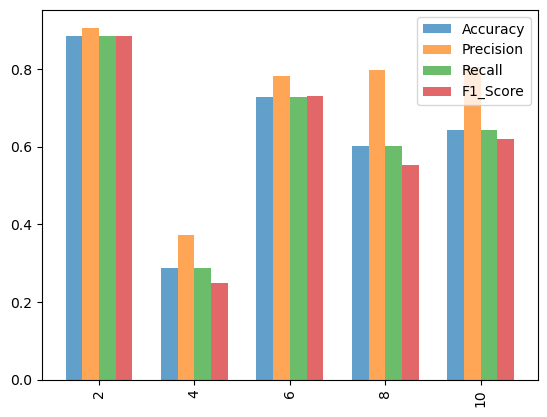

In [51]:
ErrorMetrics_pd.plot.bar(width=0.7, alpha=0.7)

### 2.For any specified number of clients, compare the model's performance when one (or more) dishonest clients are present. Plot the performance metrics before and after the presence of dishonest clients.

#### Take 6 Clients, one of them is assumed dishonest



In [65]:
# Split data into 6 clients

In [106]:
Client_1 = (x_train[0:10000], y_train[0:10000])
Client_2 = (x_train[10000:20000], y_train[10000:20000])
Client_3 = (x_train[20000:30000], y_train[20000:30000])
Client_4 = (x_train[30000:40000], y_train[30000:40000])
Client_5 = (x_train[40000:50000], y_train[40000:50000])
Client_6 = (x_train[50000:], y_train[50000:])

In [107]:
Client_2[1].size

10000

In [108]:
Client_2[1]

array([3, 8, 7, ..., 1, 4, 2], dtype=uint8)

In [109]:
### Client_2 is assumed dishonest and changing the training data. Some labels are set as 4 
### Change the first 2000 labels

Client_2[1][:2000] = 4

In [110]:
Client_2[1]

array([4, 4, 4, ..., 1, 4, 2], dtype=uint8)

In [111]:
print(Client_1[0].shape)
print(Client_2[0].shape)
print(Client_3[0].shape)
print(Client_4[0].shape)
print(Client_5[0].shape)
print(Client_6[0].shape)

print(Client_1[1].shape)
print(Client_2[1].shape)
print(Client_3[1].shape)
print(Client_4[1].shape)
print(Client_5[1].shape)
print(Client_6[1].shape)

(10000, 28, 28, 1)
(10000, 28, 28, 1)
(10000, 28, 28, 1)
(10000, 28, 28, 1)
(10000, 28, 28, 1)
(10000, 28, 28, 1)
(10000,)
(10000,)
(10000,)
(10000,)
(10000,)
(10000,)


In [112]:
# Create and train client models
client1_model = create_client_model()
client2_model = create_client_model()
client3_model = create_client_model()
client4_model = create_client_model()
client5_model = create_client_model()
client6_model = create_client_model()

client1_model = train_client_model(client1_model, Client_1[0], Client_1[1])
client2_model = train_client_model(client2_model, Client_2[0], Client_1[1])
client3_model = train_client_model(client3_model, Client_3[0], Client_1[1])
client4_model = train_client_model(client4_model, Client_4[0], Client_1[1])
client5_model = train_client_model(client5_model, Client_5[0], Client_5[1])
client6_model = train_client_model(client6_model, Client_6[0], Client_6[1])

Epoch 1/5
313/313 [==============================] - 1s 2ms/step - loss: 0.5229 - accuracy: 0.8590
Epoch 2/5
313/313 [==============================] - 1s 2ms/step - loss: 0.2414 - accuracy: 0.9304
Epoch 3/5
313/313 [==============================] - 1s 2ms/step - loss: 0.1776 - accuracy: 0.9508
Epoch 4/5
313/313 [==============================] - 1s 2ms/step - loss: 0.1330 - accuracy: 0.9635
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.1045 - accuracy: 0.9712
Epoch 1/5
313/313 [==============================] - 2s 2ms/step - loss: 2.3198 - accuracy: 0.1056
Epoch 2/5
313/313 [==============================] - 1s 2ms/step - loss: 2.2949 - accuracy: 0.1164
Epoch 3/5
313/313 [==============================] - 1s 2ms/step - loss: 2.2815 - accuracy: 0.1360
Epoch 4/5
313/313 [==============================] - 1s 2ms/step - loss: 2.2617 - accuracy: 0.1532
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 2.2336 - accuracy: 0.1746
Epoch 1/5


In [113]:
# Federated averaging
def federated_average_weights(weights1, weights2, weights3, weights4, weights5, weights6):
    new_weights = []
    for w1, w2, w3, w4, w5, w6 in zip(weights1, weights2, weights3, weights4, weights5, weights6):
        new_weights.append((w1 + w2 + w3 + w4 + w5 + w6) / 6)
    return new_weights


# Aggregate models
aggregated_weights = federated_average_weights(client1_model.get_weights(), 
                                               client2_model.get_weights(), 
                                               client3_model.get_weights(),
                                               client4_model.get_weights(),
                                               client5_model.get_weights(),
                                               client6_model.get_weights())

# Create global model and set weights
global_model = create_client_model()
global_model.set_weights(aggregated_weights)

In [114]:
# Evaluate global model
test_loss, test_acc = global_model.evaluate(x_test, y_test, verbose=2)
print('Test accuracy:', test_acc)

predictions = global_model.predict(x_test)
print(predictions.shape)

predictions = list(predictions.argmax(axis=1))

print("Accuracy test set: ", accuracy_score(y_test, predictions))

print("Precision test set: ", precision_score(y_test, predictions, average = 'weighted' )) 
print("Recall test set: ", recall_score(y_test, predictions, average = 'weighted' ))
print("F-score test set: ", f1_score(y_test, predictions, average = 'weighted' ))

print(classification_report(y_test, predictions))

313/313 - 1s - loss: 1.9523 - accuracy: 0.7198 - 512ms/epoch - 2ms/step
Test accuracy: 0.7197999954223633
313/313 [==============================] - 0s 1ms/step
(10000, 10)
Accuracy test set:  0.7198
Precision test set:  0.7649681801937827
Recall test set:  0.7198
F-score test set:  0.7079021148713025
              precision    recall  f1-score   support

           0       0.99      0.55      0.70       980
           1       0.78      0.96      0.86      1135
           2       0.92      0.72      0.81      1032
           3       0.67      0.62      0.64      1010
           4       0.60      0.86      0.71       982
           5       0.48      0.88      0.62       892
           6       0.74      0.92      0.82       958
           7       0.80      0.64      0.71      1028
           8       0.80      0.82      0.81       974
           9       0.83      0.24      0.37      1009

    accuracy                           0.72     10000
   macro avg       0.76      0.72      0.71    

In [115]:
test_accuracy_dishonest  = []
test_precision_dishonest = []
test_recall_dishonest    = []
test_f1_score_dishonest  = []

In [116]:
test_accuracy_dishonest.append(test_accuracy[2])
test_precision_dishonest.append(test_precision[2])
test_recall_dishonest.append(test_recall[2])
test_f1_score_dishonest.append(test_f1_score[2])

test_accuracy_dishonest.append(0.7197999954223633)
test_precision_dishonest.append(0.7649681801937827)
test_recall_dishonest.append(0.7198)
test_f1_score_dishonest.append(0.7079021148713025)

print(test_accuracy_dishonest)
print(test_precision_dishonest)
print(test_recall_dishonest)
print(test_f1_score_dishonest)

[0.7271999716758728, 0.7197999954223633]
[0.7834205071021751, 0.7649681801937827]
[0.7272, 0.7198]
[0.7308748558259915, 0.7079021148713025]


In [117]:
### Plot the model's performance for the 6 clients, one of them (number=2) is dishonest

ErrorMetrics = []
ErrorMetrics.append(test_accuracy_dishonest)
ErrorMetrics.append(test_precision_dishonest)
ErrorMetrics.append(test_recall_dishonest)
ErrorMetrics.append(test_f1_score_dishonest)

print(ErrorMetrics)

ErrorMetrics_pd = pd.DataFrame(ErrorMetrics)
ErrorMetrics_pd.columns = ['All are honest', '#2 is dishonest']
ErrorMetrics_pd = ErrorMetrics_pd.T
ErrorMetrics_pd.columns = ['Accuracy','Precision','Recall','F1_Score']
ErrorMetrics_pd

[[0.7271999716758728, 0.7197999954223633], [0.7834205071021751, 0.7649681801937827], [0.7272, 0.7198], [0.7308748558259915, 0.7079021148713025]]


,Accuracy,Precision,Recall,F1_Score
All are honest,0.7272,0.783421,0.7272,0.730875
#2 is dishonest,0.7198,0.764968,0.7198,0.707902


<Axes: >

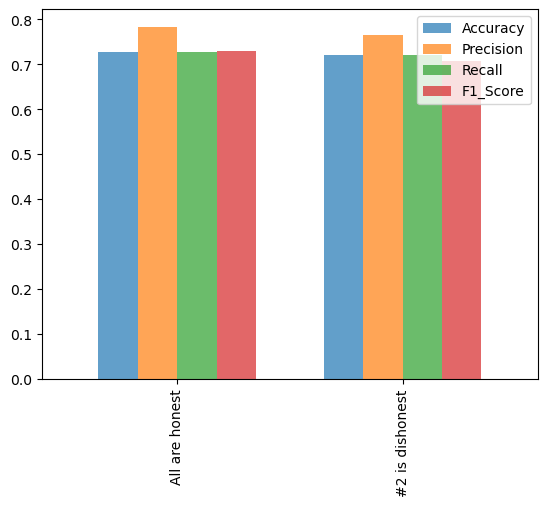

In [118]:
ErrorMetrics_pd.plot.bar(width=0.7, alpha=0.7)